In [2]:
import numpy as np
import random as random
import matplotlib.pyplot as plt

In [16]:
class LogisticRegression:
    
    def __init__(self):
        pass

    def sigmoid(self, a):
        return 1 / (1 + np.exp(-a))

    def train(self, X, y_true, n_iters, learning_rate):
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0
        costs = []       
        for i in range(n_iters):
            y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)
            cost = (- 1 / n_samples) * np.sum(y_true * np.log(y_predict) + (1 - y_true) * (np.log(1 - y_predict)))
            dw = (1 / n_samples) * np.dot(X.T, (y_predict - y_true))
            db = (1 / n_samples) * np.sum(y_predict - y_true)
            self.weights = self.weights - learning_rate * dw
            self.bias = self.bias - learning_rate * db
            costs.append(cost)
            if i % 100 == 0:
                print(f"Cost after iteration {i}: {cost}")

        return self.weights, self.bias, costs

    def predict(self, X):
        y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)
        y_predict_labels = [1 if elem > 0.5 else 0 for elem in y_predict]
        return np.array(y_predict_labels)[:, np.newaxis]
    
    def confusion_metrics(self,labels,predictions,threshold):
        true_positive=0;
        false_positive=0;
        true_negative=0;
        false_negative=0;
        for i in range(len(labels)):
            if labels[i]==1:
                if predictions[i]>=threshold:
                    true_positive+=1;
                else:
                    false_negative+=1;
            else:
                if predictions[i]>=threshold:
                    false_positive+=1;
                else:
                    true_negative+=1;
        tpf=true_positive/(true_positive + false_negative);
        fpf=false_positive/(false_positive + true_negative);
        return tpf,fpf;

    def results(self,labels,predictions):
        TPF=[];
        FPF=[];
        THRESHOLD=[];
        i=0;
        #increemental step size for threshold
        dx_step=0.00001;
        while(i<=1):
            threshold=i;
            tpf,fpf=self.confusion_metrics(labels,predictions,threshold);
            TPF.append(tpf);
            FPF.append(fpf);
            THRESHOLD.append(threshold);
            i+=dx_step;

        plt.plot(FPF,TPF);
        plt.plot(THRESHOLD,THRESHOLD,'--')
        plt.xlabel("False Positive fraction (FPF)--->")
        plt.ylabel("True Positive fraction (TPF)--->")
        plt.title("ROC Curve")
        plt.show()
        area = np.trapz(TPF, dx=dx_step)
        print("AUC:Area under the ROC curve is", area)
        return;

In [22]:
def main():
    mean1 = [1, 0]
    mean2 = [0, 1]
    cov1 = [[1, .75], [.75, 1]]
    cov2 = [[1, -.5], [.5, 1]] 
    #Creating training set
    x1, y1 = np.random.multivariate_normal(mean1, cov1, 500).T
    x2, y2 = np.random.multivariate_normal(mean2, cov2, 500).T
    X= np.concatenate([x1,x2])
    Y= np.concatenate([y1,y2])
    z1=np.vstack((x1,y1)).T
    z2=np.vstack((x2,y2)).T
    X_train= np.concatenate([z1,z2])
    #Y_train
    arr1 = np.zeros(len(x1),dtype=int)
    arr2 = np.ones(len(x2),dtype=int)
    arr = np.concatenate((arr1, arr2))
    Y_train = arr[:, np.newaxis]
    #Train_data=np.array(Z)
    plt.plot(X, Y, 'x')
    plt.axis('equal')
    plt.show()
    #Creating test set
    x11, y11 = np.random.multivariate_normal(mean1, cov1, 500).T
    x22, y22 = np.random.multivariate_normal(mean2, cov2, 500).T
    val11= np.zeros(len(x11))
    val22= np.ones(len(x22))
    X11= np.concatenate([x11,x22])
    Y11= np.concatenate([y11,y22])
    z11=np.vstack((x11,y11)).T
    z22=np.vstack((x22,y22)).T
    X_test= np.concatenate([z11,z22])
    #Test_data=np.array(Z11)
    plt.plot(X11, Y11, 'x')
    plt.axis('equal')
    plt.show()
    #Y_test
    arr11 = np.zeros(len(x11),dtype=int)
    arr22 = np.ones(len(x22),dtype=int)
    arr = np.concatenate((arr11, arr22))
    Y_test = arr[:, np.newaxis]

    regressor = LogisticRegression()
    w_trained, b_trained, costs = regressor.train(X_train, Y_train, n_iters=10000, learning_rate= 1)

    fig = plt.figure(figsize=(8,6))
    plt.plot(np.arange(10000), costs)
    plt.title("Development of cost over training (Learing rate= 1)")
    plt.xlabel("Number of iterations")
    plt.ylabel("Cost")
    plt.show()
    y_p_train = regressor.predict(X_train)
    y_p_test = regressor.predict(X_test)

    print(f"train accuracy: {100 - np.mean(np.abs(y_p_train - Y_train)) * 100}%")
    print(f"test accuracy: {100 - np.mean(np.abs(y_p_test - Y_test))*100}%")
    regressor.results(Y_test,y_p_test);

C:\Users\zrt1748xx\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  


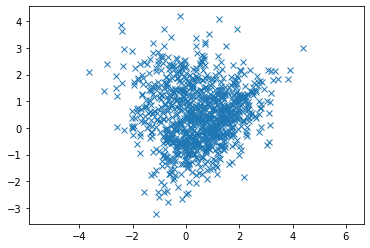

C:\Users\zrt1748xx\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: covariance is not positive-semidefinite.


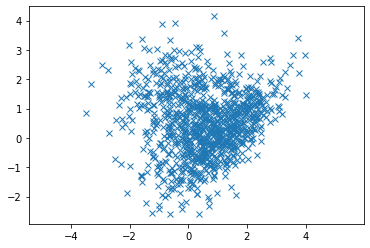

Cost after iteration 0: 0.6931471805599454
Cost after iteration 100: 0.3798604158390542
Cost after iteration 200: 0.37984753404649774
Cost after iteration 300: 0.37984752462883636
Cost after iteration 400: 0.3798475246217582
Cost after iteration 500: 0.37984752462175286
Cost after iteration 600: 0.37984752462175286
Cost after iteration 700: 0.37984752462175286
Cost after iteration 800: 0.3798475246217528
Cost after iteration 900: 0.37984752462175286
Cost after iteration 1000: 0.37984752462175286
Cost after iteration 1100: 0.37984752462175286
Cost after iteration 1200: 0.37984752462175286
Cost after iteration 1300: 0.37984752462175286
Cost after iteration 1400: 0.37984752462175286
Cost after iteration 1500: 0.37984752462175286
Cost after iteration 1600: 0.37984752462175286
Cost after iteration 1700: 0.37984752462175286
Cost after iteration 1800: 0.37984752462175286
Cost after iteration 1900: 0.37984752462175286
Cost after iteration 2000: 0.37984752462175286
Cost after iteration 2100: 0.

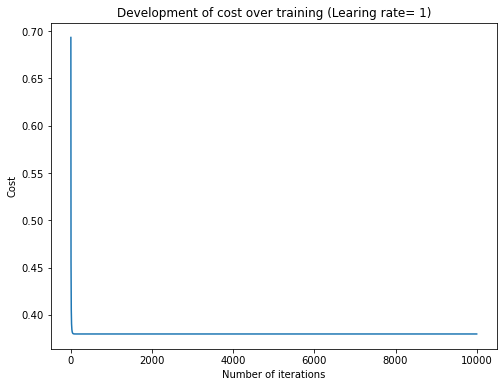

train accuracy: 85.7%
test accuracy: 83.3%


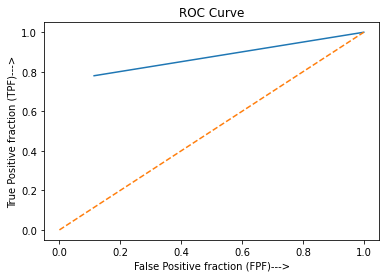

AUC:Area under the ROC curve is 0.7800011000000001


In [23]:
if __name__ == '__main__':

    main()